In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import sys
import math
import scipy
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn

# Electonic Arts

In [10]:
df = yf.download('OTGLY', '2020-10-22', '2021-03-18')
v_ea = df[['Close']]
print(v_ea)

[*********************100%***********************]  1 of 1 completed
                Close
Date                 
2020-10-21  23.500000
2020-10-22  24.040001
2020-10-23  23.030001
2020-10-26  23.750000
2020-10-27  22.559999
2020-10-28  21.000000
2020-10-29  22.950001
2020-10-30  22.000000
2020-11-02  22.049999
2020-11-03  24.350000
2020-11-04  25.750000
2020-11-05  25.150000
2020-11-06  25.100000
2020-11-09  25.500000
2020-11-10  24.799999
2020-11-11  25.110001
2020-11-12  25.105000
2020-11-13  24.299999
2020-11-16  24.010000
2020-11-17  25.000000
2020-11-18  24.770000
2020-11-19  24.000000
2020-11-20  25.344999
2020-11-23  25.500000
2020-11-24  25.010000
2020-11-25  24.900000
2020-11-27  24.889999
2020-11-30  26.520000
2020-12-01  28.350000
2020-12-02  29.160000
...               ...
2021-02-03  19.459999
2021-02-04  19.330000
2021-02-05  19.610001
2021-02-08  19.465000
2021-02-09  18.650000
2021-02-10  18.370001
2021-02-11  18.080000
2021-02-12  17.900000
2021-02-16  18.320000
2021-02

In [11]:
d_ea=np.zeros(100)
for i in range(100):
    d_ea[i] = v_ea.Close[i+1]/v_ea.Close[i]  
for i in range(100):
    print(d_ea[i])

1.0229787623628657
0.9579866809310527
1.0312635385100966
0.9498947143554688
0.9308510858656078
1.092857179187593
0.958605632620564
1.0022726925936611
1.1043084455324357
1.0574948499629457
0.9766990143118552
0.9980119587348341
1.0159362395398837
0.9725489896886489
1.0125000557591854
0.9998008336123587
0.9679346616270015
0.9880658840623984
1.0412328097326415
0.9908000183105469
0.9689139909756308
1.0560416380564372
1.0061156319133864
0.9807843227012485
0.9956017349322319
0.9995983843761028
1.0654881923698696
1.06900452081894
1.0285714093489684
0.9979424051352419
1.0652920822550969
0.9145161413377331
0.9749558736413505
1.0014472111581278
0.9015534555120583
0.9168502997682519
0.9069056276706946
0.9879518072289156
1.0341463786799734
1.0372641028183234
0.841291504891148
0.9713513142353779
1.0740122412090276
0.9792746303449494
0.9708995106792856
1.0297002760198468
1.0039692433857552
0.9778597737745687
0.9870620064156835
1.013107579362008
0.9811321569533091
1.006593347629365
0.9377729580437433


Text(0.5, 1.0, 'Electronic Arts')

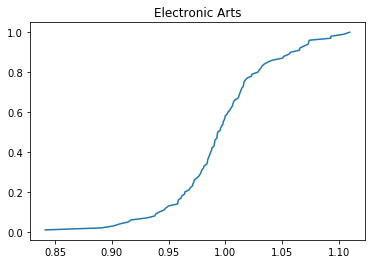

In [12]:
ecdf = ECDF(d_ea)
plt.plot(ecdf.x,ecdf.y)
plt.title("Electronic Arts")

In [14]:
def var(returns, alpha):
    # This method calculates the historical simulation var of the returns
    sorted_returns = np.sort(returns)
    # Calculate the index associated with alpha
    index = int(alpha * len(sorted_returns))
    # VaR should be positive
    return abs(sorted_returns[index])

print(var(d_ea, 0.05))

0.9168502997682519


In [16]:
ea_mean = np.mean(d_ea)
ea_std = np.std(d_ea)
var95_ea = norm.ppf(0.05, ea_mean, ea_std)
print(var95_ea)

0.9217939012967042


In [101]:
s_var = np.sort(d_ea)[0]
for i in range(1, 5):
    s_var += np.sort(d_ea)[i]
cvar95_ea = abs(s_var / 5)
print(cvar95_ea)

0.9537173102101854


# Activision Blizzard

In [102]:
df = yf.download('ATVI', '2020-10-22', '2021-03-18')
v_atvi = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [144]:
d_atvi=np.zeros(100)
for i in range(100):
    d_atvi[i] = v_atvi.Close[i+1]/v_atvi.Close[i]  
for i in range(100):
    print(d_atvi[i])    
    

0.9857211891203385
1.0033428783419929
0.9932131904547841
1.0058392500084123
0.9759140690428172
0.9843057149773768
0.9737688906494933
1.0088471958173229
0.9981675472925087
1.040781543708796
1.0097013558828378
0.9834040199502861
0.9568583428269168
0.9961543442322751
1.0190362120991914
1.0020900852558643
1.0109503842694634
0.9985815524690805
0.9957386128531649
0.979120728859968
1.005695368280474
1.0115895858011472
0.9884129746395381
0.9909115538902377
1.017014471915199
1.0213043681598082
1.0171487583536207
1.0056617630754408
0.9902414765880294
0.9954516664129961
1.0265261621221626
1.0171859475377232
1.016530942820528
0.9874447512035478
1.0064180039663981
1.0068583767373145
1.0270076736136278
1.0114032545927285
1.0149563170633185
1.0027204472959497
1.021591721477246
0.98273757728698
1.0068686029402163
1.0088347230116774
1.0083139342380183
1.0051671198926315
0.9993437869584
1.002298337289702
1.0138676197605814
0.9682283576012723
1.008787551747704
0.9703384897012851
1.018977251919833
1.01817

Text(0.5, 1.0, 'Activision Blizzard')

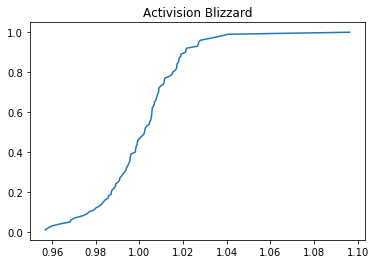

In [104]:
ecdf = ECDF(d_atvi)
plt.plot(ecdf.x,ecdf.y)
plt.title("Activision Blizzard")

In [105]:
atvi_mean = np.mean(d_atvi)
atvi_std = np.std(d_atvi)
var95_atvi = norm.ppf(1-0.95, atvi_mean, atvi_std)
print(var95_atvi)

0.9694722933026952


In [130]:
s_var = np.sort(d_atvi)[0]
for i in range(1, 5):
    s_var += np.sort(d_atvi)[i]
cvar95_atvi = abs(s_var / 5)
print(cvar95_atvi)

0.9613320863246457


# Portfolio Optimization

In [107]:
p_var_max = 0
p_var = 0
j = 0
for i in range(100):
    p_mean = np.mean(i/100 * d_ea + (1 - i/100) * d_atvi)
    p_std = np.std(i/100 * d_ea + (1 - i/100) * d_atvi)
    p_var = norm.ppf(1-0.95, p_mean, p_std)
    if(p_var > p_var_max):
        p_var_max = p_var
        j = i      
print(p_var_max, j)

0.9728232566079258 55


In [139]:
p_cvar_max = 0
p_cvar = 0
n = 0
for i in range(100):  
    port_cvar = np.zeros(100)
    for j in range(100):
        port_cvar[j] = i/100 * d_atvi[j] + (1 - i/100) * d_ea[j]
    s_var = np.sort(port_cvar)[0]
    for j in range(1, 5):
        s_var += np.sort(port_cvar)[j]
    p_cvar = abs(s_var / 5)
    if(p_cvar > p_cvar_max):
        p_cvar_max = p_cvar
        n = i
print(p_cvar_max, n)    

0.9652916452559118 74
